# Top related factors to ICU usage from patients of covid19 in Mexico

In [2]:
import pandas as pd
import numpy as np
import scipy.spatial.distance as SSD
import math
import re 

file_path = 'open_data_covid19_20200827/200827COVID19MEXICO.csv'
df = pd.read_csv(file_path, encoding='latin-1') # utf-8 couldn't load file


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304776 entries, 0 to 1304775
Data columns (total 35 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   FECHA_ACTUALIZACION  1304776 non-null  object
 1   ID_REGISTRO          1304776 non-null  object
 2   ORIGEN               1304776 non-null  int64 
 3   SECTOR               1304776 non-null  int64 
 4   ENTIDAD_UM           1304776 non-null  int64 
 5   SEXO                 1304776 non-null  int64 
 6   ENTIDAD_NAC          1304776 non-null  int64 
 7   ENTIDAD_RES          1304776 non-null  int64 
 8   MUNICIPIO_RES        1304776 non-null  int64 
 9   TIPO_PACIENTE        1304776 non-null  int64 
 10  FECHA_INGRESO        1304776 non-null  object
 11  FECHA_SINTOMAS       1304776 non-null  object
 12  FECHA_DEF            1304776 non-null  object
 13  INTUBADO             1304776 non-null  int64 
 14  NEUMONIA             1304776 non-null  int64 
 15  EDAD           

In [4]:
df.columns = ['UPDATE_DATE', 'REGISTRATION_ID', 'USMER_ORIGIN', 'SECTOR', 'MU_STATE',
       'SEX', 'BIRTH_STATE', 'RES_STATE', 'RES_MUNICIPALITY', 'PATIENT_TYPE',
       'ENTRY_DATE', 'SYMPTOM_DATE', 'DECEASED_DATE', 'INTUBATED', 'PNEUMONIA',
       'AGE', 'NATIONALITY', 'PREGNANCY', 'SPEAK_NATIVE_LANGUE', 'DIABETES',
       'COPD', 'ASTHMA', 'INMUSUPR', 'HYPERTENSION', 'OTHER_COM',
       'CARDIOVASCULAR', 'OBESITY', 'CHRONIC_KIDNEY', 'SMOKING',
       'OTHER_CASE', 'TEST_RESULT', 'MIGRANT', 'COUNTRY_NATIONALITY',
       'COUNTRY_ORIGIN', 'ICU'] 
df.head()

,UPDATE_DATE,REGISTRATION_ID,USMER_ORIGIN,SECTOR,MU_STATE,SEX,BIRTH_STATE,RES_STATE,RES_MUNICIPALITY,PATIENT_TYPE,...,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,SMOKING,OTHER_CASE,TEST_RESULT,MIGRANT,COUNTRY_NATIONALITY,COUNTRY_ORIGIN,ICU
0,2020-08-27,0c98bd,2,4,12,2,12,12,1,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
1,2020-08-27,15b849,2,4,14,1,14,14,39,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
2,2020-08-27,0ad701,2,4,9,1,9,9,11,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
3,2020-08-27,076f46,2,4,2,2,2,2,4,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
4,2020-08-27,1762e4,2,4,23,1,31,23,5,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97


In [5]:
debug_encoding =[['Ã¡', 'á'], ['Ã©', 'é'], ['Ã³', 'ó'], 
              ['Ãº', 'u'], ['Ã', 'í']] 
for exp in debug_encoding:
    df['COUNTRY_NATIONALITY'] = df['COUNTRY_NATIONALITY'].map(lambda x: re.sub(exp[0], exp[1], x))

In [6]:
df.head()

,UPDATE_DATE,REGISTRATION_ID,USMER_ORIGIN,SECTOR,MU_STATE,SEX,BIRTH_STATE,RES_STATE,RES_MUNICIPALITY,PATIENT_TYPE,...,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,SMOKING,OTHER_CASE,TEST_RESULT,MIGRANT,COUNTRY_NATIONALITY,COUNTRY_ORIGIN,ICU
0,2020-08-27,0c98bd,2,4,12,2,12,12,1,1,...,2,2,2,2,1,1,99,México,99,97
1,2020-08-27,15b849,2,4,14,1,14,14,39,2,...,2,1,2,2,99,1,99,México,99,2
2,2020-08-27,0ad701,2,4,9,1,9,9,11,1,...,2,2,2,2,1,1,99,México,99,97
3,2020-08-27,076f46,2,4,2,2,2,2,4,2,...,2,2,2,2,99,1,99,México,99,2
4,2020-08-27,1762e4,2,4,23,1,31,23,5,1,...,2,2,2,2,1,1,99,México,99,97


In [7]:
# reordering columns
rng =  [34] + list(range(19,31)) + [15,16,14,0,3,13,1,2,4,5,6,7,17,18,31,32,33,8,11,12,9,10]
df = df.iloc[:,rng]


In [8]:
df.head() # 97 means not apply

,ICU,DIABETES,COPD,ASTHMA,INMUSUPR,HYPERTENSION,OTHER_COM,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,...,PREGNANCY,SPEAK_NATIVE_LANGUE,MIGRANT,COUNTRY_NATIONALITY,COUNTRY_ORIGIN,RES_MUNICIPALITY,SYMPTOM_DATE,DECEASED_DATE,PATIENT_TYPE,ENTRY_DATE
0,97,2,2,1,2,2,2,2,2,2,...,97,2,99,México,99,1,2020-04-25,9999-99-99,1,2020-04-28
1,2,2,1,2,2,1,2,2,1,2,...,2,2,99,México,99,39,2020-04-07,2020-04-10,2,2020-04-08
2,97,2,2,2,2,2,1,2,2,2,...,2,2,99,México,99,11,2020-04-11,9999-99-99,1,2020-04-15
3,2,2,2,2,2,2,2,2,2,2,...,97,2,99,México,99,4,2020-04-10,2020-04-20,2,2020-04-17
4,97,2,2,2,2,2,2,2,2,2,...,2,2,99,México,99,5,2020-04-13,9999-99-99,1,2020-04-14


In [9]:
df.shape

(1304776, 35)

# We search for outliers

### The REGISTRATION_ID column is supposed to be unique 

In [10]:
id_duplicates = df.duplicated('REGISTRATION_ID', keep = False) # mark both duplicates as True
number_of_duplicates = id_duplicates.sum()
print(f'{number_of_duplicates} duplicates found')

0 duplicates found


In [11]:
df['REGISTRATION_ID']

0          0c98bd
1          15b849
2          0ad701
3          076f46
4          1762e4
            ...  
1304771    14ee75
1304772    060892
1304773    15281e
1304774    0c8d07
1304775    199f85
Name: REGISTRATION_ID, Length: 1304776, dtype: object

##### checking well formatted dates

In [12]:
re_date = re.compile('\d{4}-\d{2}-\d{2}')
well_formatted = df['DECEASED_DATE'].map(lambda date: bool(re_date.match(date)))
print('{} errors found'.format( len(well_formatted)-well_formatted.sum()))

0 errors found


In [13]:
well_formatted = df['ENTRY_DATE'].map(lambda date: bool(re_date.match(date)))
print('{} errors found'.format( len(well_formatted)-well_formatted.sum()))

0 errors found


In [14]:
well_formatted = df['SYMPTOM_DATE'].map(lambda date: bool(re_date.match(date)))
print('{} errors found'.format( len(well_formatted)-well_formatted.sum()))

0 errors found


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304776 entries, 0 to 1304775
Data columns (total 35 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ICU                  1304776 non-null  int64 
 1   DIABETES             1304776 non-null  int64 
 2   COPD                 1304776 non-null  int64 
 3   ASTHMA               1304776 non-null  int64 
 4   INMUSUPR             1304776 non-null  int64 
 5   HYPERTENSION         1304776 non-null  int64 
 6   OTHER_COM            1304776 non-null  int64 
 7   CARDIOVASCULAR       1304776 non-null  int64 
 8   OBESITY              1304776 non-null  int64 
 9   CHRONIC_KIDNEY       1304776 non-null  int64 
 10  SMOKING              1304776 non-null  int64 
 11  OTHER_CASE           1304776 non-null  int64 
 12  TEST_RESULT          1304776 non-null  int64 
 13  AGE                  1304776 non-null  int64 
 14  NATIONALITY          1304776 non-null  int64 
 15  PNEUMONIA      

In [16]:
positive_covid19 = df['TEST_RESULT'] == 1
deceased_covid19 = (df['DECEASED_DATE'] != '9999-99-99') &  (positive_covid19)
different_countries = df['COUNTRY_NATIONALITY'].nunique()
print(f'positive to covid19: {positive_covid19.sum()}',
      f'deceased by covid19: {deceased_covid19.sum()},',
      f'from {different_countries} different countries')

positive to covid19: 579914 deceased by covid19: 62594, from 116 different countries


In [17]:
congruent_dates =  df['SYMPTOM_DATE'] <= df['ENTRY_DATE'] 
print('{} errors found'.format( len(congruent_dates)-congruent_dates.sum()))

0 errors found


In [18]:
congruent_dates = (df['ENTRY_DATE'] <= df['DECEASED_DATE']) 
print('{} errors found'.format( len(congruent_dates)-congruent_dates.sum()))

159 errors found


In [19]:
fail_dates = df.loc[df['ENTRY_DATE'] > df['DECEASED_DATE'], 
     ['SYMPTOM_DATE', 'ENTRY_DATE', 'DECEASED_DATE', 'PATIENT_TYPE', 'TEST_RESULT']]
fail_dates
# for patient_type 1 means outpatient and 2 means hospitalized
# entry_date is the date when patient went to consult or when information was received
# in the medical unit

,SYMPTOM_DATE,ENTRY_DATE,DECEASED_DATE,PATIENT_TYPE,TEST_RESULT
142,2020-04-27,2020-05-04,2020-05-01,1,1
1927,2020-06-07,2020-06-16,2020-06-14,2,1
2520,2020-06-04,2020-06-06,2020-06-05,1,1
11764,2020-06-15,2020-06-17,2020-06-16,2,1
14555,2020-05-01,2020-05-04,2020-05-03,1,1
...,...,...,...,...,...
1255228,2020-08-17,2020-08-19,2020-08-18,1,3
1267901,2020-08-01,2020-08-08,2020-08-07,2,3
1274894,2020-08-25,2020-08-26,2020-08-25,1,3
1278784,2020-08-16,2020-08-22,2020-08-21,1,3


In [20]:
errors = []

columns_yes_no = ['ICU', 'DIABETES', 'COPD', 'ASTHMA', 'INMUSUPR', 'HYPERTENSION',
         'OTHER_COM', 'CARDIOVASCULAR', 'OBESITY', 'CHRONIC_KIDNEY', 'SMOKING',
         'OTHER_CASE', 'NATIONALITY', 'PNEUMONIA', 'INTUBATED', 'USMER_ORIGIN', 
         'SEX', 'PREGNANCY', 'SPEAK_NATIVE_LANGUE', 'MIGRANT', 'PATIENT_TYPE']
admisible_value_set = {1,2,97,98,99} # 1: yes, 2: no, 97: no applies, 98: unknown, 99: not specified 
for col in columns_yes_no:
    values_set = set(df[col].values)
    if values_set.issubset(admisible_value_set):
        pass
    else: 
        errors.append([col,values_set])
print(errors)        

[]


In [21]:
sort_by = 'ICU'
column_to_compare = 'INTUBATED' 
df.sort_values(sort_by, ascending = False) [[sort_by,column_to_compare]]

,ICU,INTUBATED
915697,99,99
447840,99,99
82014,99,99
216202,99,99
252024,99,99
...,...,...
49215,1,2
143293,1,2
632348,1,1
462912,1,2


## We only care about positive cases of covid19 so we extract this data only.

In [22]:
df = df.loc[df['TEST_RESULT']== 1,:]
df = df.drop(['TEST_RESULT', 'UPDATE_DATE','REGISTRATION_ID'], axis='columns')
df['DECEASED'] = df['DECEASED_DATE'].map(lambda date: 1 if date!='9999-99-99' else 0) # new column

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579914 entries, 0 to 927331
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ICU                  579914 non-null  int64 
 1   DIABETES             579914 non-null  int64 
 2   COPD                 579914 non-null  int64 
 3   ASTHMA               579914 non-null  int64 
 4   INMUSUPR             579914 non-null  int64 
 5   HYPERTENSION         579914 non-null  int64 
 6   OTHER_COM            579914 non-null  int64 
 7   CARDIOVASCULAR       579914 non-null  int64 
 8   OBESITY              579914 non-null  int64 
 9   CHRONIC_KIDNEY       579914 non-null  int64 
 10  SMOKING              579914 non-null  int64 
 11  OTHER_CASE           579914 non-null  int64 
 12  AGE                  579914 non-null  int64 
 13  NATIONALITY          579914 non-null  int64 
 14  PNEUMONIA            579914 non-null  int64 
 15  SECTOR               579914 non-nu

In [24]:
df.head()

,ICU,DIABETES,COPD,ASTHMA,INMUSUPR,HYPERTENSION,OTHER_COM,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,...,SPEAK_NATIVE_LANGUE,MIGRANT,COUNTRY_NATIONALITY,COUNTRY_ORIGIN,RES_MUNICIPALITY,SYMPTOM_DATE,DECEASED_DATE,PATIENT_TYPE,ENTRY_DATE,DECEASED
0,97,2,2,1,2,2,2,2,2,2,...,2,99,México,99,1,2020-04-25,9999-99-99,1,2020-04-28,0
1,2,2,1,2,2,1,2,2,1,2,...,2,99,México,99,39,2020-04-07,2020-04-10,2,2020-04-08,1
2,97,2,2,2,2,2,1,2,2,2,...,2,99,México,99,11,2020-04-11,9999-99-99,1,2020-04-15,0
3,2,2,2,2,2,2,2,2,2,2,...,2,99,México,99,4,2020-04-10,2020-04-20,2,2020-04-17,1
4,97,2,2,2,2,2,2,2,2,2,...,2,99,México,99,5,2020-04-13,9999-99-99,1,2020-04-14,0


In [25]:
df.columns

Index(['ICU', 'DIABETES', 'COPD', 'ASTHMA', 'INMUSUPR', 'HYPERTENSION',
       'OTHER_COM', 'CARDIOVASCULAR', 'OBESITY', 'CHRONIC_KIDNEY', 'SMOKING',
       'OTHER_CASE', 'AGE', 'NATIONALITY', 'PNEUMONIA', 'SECTOR', 'INTUBATED',
       'USMER_ORIGIN', 'MU_STATE', 'SEX', 'BIRTH_STATE', 'RES_STATE',
       'PREGNANCY', 'SPEAK_NATIVE_LANGUE', 'MIGRANT', 'COUNTRY_NATIONALITY',
       'COUNTRY_ORIGIN', 'RES_MUNICIPALITY', 'SYMPTOM_DATE', 'DECEASED_DATE',
       'PATIENT_TYPE', 'ENTRY_DATE', 'DECEASED'],
      dtype='object')

In [26]:
to_binary = lambda x: 0 if x == 2 else x

In [27]:
columns_binary = ['ICU', 'DIABETES', 'COPD', 'ASTHMA', 'INMUSUPR', 'HYPERTENSION',
         'OTHER_COM', 'CARDIOVASCULAR', 'OBESITY', 'CHRONIC_KIDNEY', 'SMOKING',
         'OTHER_CASE', 'NATIONALITY', 'PNEUMONIA', 'INTUBATED', 'USMER_ORIGIN', 
         'SEX', 'PREGNANCY', 'SPEAK_NATIVE_LANGUE', 'MIGRANT', 'PATIENT_TYPE', 'DECEASED']
for col in columns_binary:
    df[col] = df.loc[:,col].map(to_binary)


In [28]:
df['PATIENT_TYPE'] = df['PATIENT_TYPE'].map(lambda x: 1-x) # 1 is now for hospitalized patient

In [29]:
corr = df.corr()
corr

,ICU,DIABETES,COPD,ASTHMA,INMUSUPR,HYPERTENSION,OTHER_COM,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,...,MU_STATE,SEX,BIRTH_STATE,RES_STATE,PREGNANCY,SPEAK_NATIVE_LANGUE,MIGRANT,RES_MUNICIPALITY,PATIENT_TYPE,DECEASED
ICU,1.000000,-0.032249,-0.014909,-0.011963,-0.015685,-0.032631,-0.032987,-0.017658,-0.021841,-0.017494,...,-0.011702,0.099485,-0.015984,-0.012143,-0.096710,0.023344,-0.013941,-0.052776,-0.999377,-0.501154
DIABETES,-0.032249,1.000000,0.838514,0.840290,0.808761,0.851242,0.636943,0.813708,0.762942,0.818283,...,-0.009718,-0.008695,-0.006937,-0.009458,0.012958,0.018686,0.000174,-0.001620,0.032339,0.030560
COPD,-0.014909,0.838514,1.000000,0.922734,0.883436,0.868163,0.690212,0.887733,0.825739,0.893485,...,-0.014181,-0.007536,-0.010644,-0.013883,0.012149,0.015619,-0.001102,-0.002154,0.014993,0.020068
ASTHMA,-0.011963,0.840290,0.922734,1.000000,0.897232,0.877449,0.699039,0.899710,0.835811,0.906235,...,-0.013908,-0.006104,-0.010043,-0.013622,0.010884,0.014996,-0.001407,-0.003368,0.012053,0.016886
INMUSUPR,-0.015685,0.808761,0.883436,0.897232,1.000000,0.851178,0.726069,0.876540,0.809429,0.879329,...,-0.019019,-0.006931,-0.015155,-0.018705,0.011657,0.013720,-0.000924,-0.004028,0.015838,0.018308
HYPERTENSION,-0.032631,0.851242,0.868163,0.877449,0.851178,1.000000,0.673410,0.864497,0.812257,0.867615,...,-0.011354,-0.007957,-0.008199,-0.011367,0.012246,0.017084,0.000845,-0.002229,0.032713,0.031539
OTHER_COM,-0.032987,0.636943,0.690212,0.699039,0.726069,0.673410,1.000000,0.712643,0.651173,0.705875,...,-0.021155,-0.007964,-0.016330,-0.020639,0.011475,0.016457,0.000229,0.009635,0.033100,0.024535
CARDIOVASCULAR,-0.017658,0.813708,0.887733,0.899710,0.876540,0.864497,0.712643,1.000000,0.834963,0.907864,...,-0.012894,-0.007837,-0.009637,-0.012591,0.012451,0.017074,-0.001007,-0.000624,0.017737,0.021017
OBESITY,-0.021841,0.762942,0.825739,0.835811,0.809429,0.812257,0.651173,0.834963,1.000000,0.844839,...,-0.012433,-0.006262,-0.010122,-0.012260,0.010729,0.016829,0.000955,-0.002751,0.021927,0.022080
CHRONIC_KIDNEY,-0.017494,0.818283,0.893485,0.906235,0.879329,0.867615,0.705875,0.907864,0.844839,1.000000,...,-0.012552,-0.008366,-0.009731,-0.012421,0.012920,0.015798,0.000258,-0.001550,0.017576,0.021172


<AxesSubplot:>

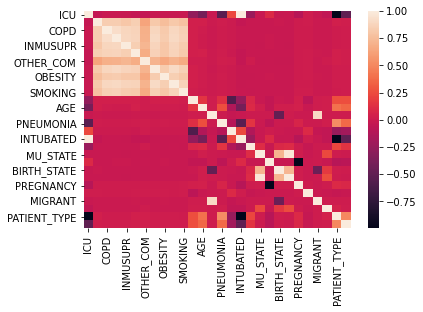

In [30]:
import seaborn
seaborn.heatmap(corr)

In [31]:
df.head()

,ICU,DIABETES,COPD,ASTHMA,INMUSUPR,HYPERTENSION,OTHER_COM,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,...,SPEAK_NATIVE_LANGUE,MIGRANT,COUNTRY_NATIONALITY,COUNTRY_ORIGIN,RES_MUNICIPALITY,SYMPTOM_DATE,DECEASED_DATE,PATIENT_TYPE,ENTRY_DATE,DECEASED
0,97,0,0,1,0,0,0,0,0,0,...,0,99,México,99,1,2020-04-25,9999-99-99,0,2020-04-28,0
1,0,0,1,0,0,1,0,0,1,0,...,0,99,México,99,39,2020-04-07,2020-04-10,1,2020-04-08,1
2,97,0,0,0,0,0,1,0,0,0,...,0,99,México,99,11,2020-04-11,9999-99-99,0,2020-04-15,0
3,0,0,0,0,0,0,0,0,0,0,...,0,99,México,99,4,2020-04-10,2020-04-20,1,2020-04-17,1
4,97,0,0,0,0,0,0,0,0,0,...,0,99,México,99,5,2020-04-13,9999-99-99,0,2020-04-14,0


## We shouldn't try to calculate pearson's correlation coeficient between binary variables.

### Instead we should use some similarity measures specific for binary vectors.

Here are some measures proposed in several scientific papers.

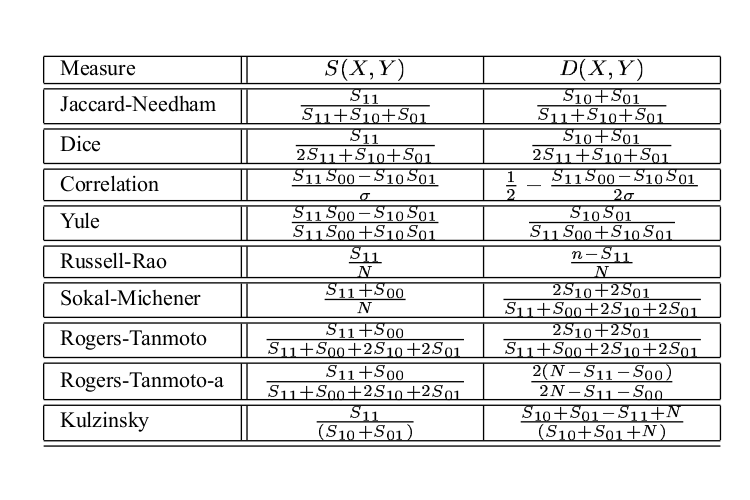

In [32]:
from IPython.display import Image
Image('binary_similarity_measures.png')

# The following image was taken from ''Properties of Binary Vector Dissimilarity Measures''
#  by Bin Zhang and Sargur N. Srihari, 

 Where $S_{ij}$  is the number of matches between $i$ and $j$ where $i$ in $X$ and $j$ in $Y$ at the corresponding positions, ($i,j \in \{0,1\}$)  

In [33]:
def counters(X,Y):
    Z = np.ones(len(X))
    S_11_bool = (X+Y) == 2
    S_00_bool = (X+Y) == 0
    S_10_bool = (X-Y) == 1
    S_01_bool = (X-Y) == -1
    
    S_X1 = Z[X==1].sum()
    S_Y1 = Z[Y==1].sum()
    S_11 = Z[S_11_bool].sum()
    S_00 = Z[S_00_bool].sum()
    S_10 = Z[S_10_bool].sum()
    S_01 = Z[S_01_bool].sum()    
    return [S_X1, S_Y1, S_11, S_00, S_10, S_01]

def correlation(X,Y):
    S_X1, S_Y1, S_11, S_00, S_10, S_01 = counters(X,Y)
    return (S_11*S_00-S_10*S_01)/max(1,math.sqrt((S_11+S_10)*(S_11+S_01)*(S_00+S_01)*(S_00+S_10)))  

def jaccard(X,Y):
    S_X1, S_Y1, S_11, S_00, S_10, S_01 = counters(X,Y)
    return (S_11)/max(1,(S_10+S_01+S_11))

def kulzinsky(X,Y):
    S_X1, S_Y1, S_11, S_00, S_10, S_01 = counters(X,Y) 
    return S_11/max(1,S_10+S_01)    

def absolute(X,Y):
    S_X1, S_Y1, S_11, S_00, S_10, S_01 = counters(X,Y)
    return S_11
    

In [34]:
columns_binary = ['ICU', 'DIABETES', 'COPD', 'ASTHMA', 'INMUSUPR', 'HYPERTENSION',
         'OTHER_COM', 'CARDIOVASCULAR', 'OBESITY', 'CHRONIC_KIDNEY', 'SMOKING',
         'OTHER_CASE', 'NATIONALITY', 'PNEUMONIA', 'INTUBATED', 'USMER_ORIGIN', 
         'SEX', 'PREGNANCY', 'SPEAK_NATIVE_LANGUE', 'MIGRANT', 'PATIENT_TYPE', 'DECEASED']

In [35]:
df_binary = df.loc[:,columns_binary]

In [36]:
df_binary

,ICU,DIABETES,COPD,ASTHMA,INMUSUPR,HYPERTENSION,OTHER_COM,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,...,NATIONALITY,PNEUMONIA,INTUBATED,USMER_ORIGIN,SEX,PREGNANCY,SPEAK_NATIVE_LANGUE,MIGRANT,PATIENT_TYPE,DECEASED
0,97,0,0,1,0,0,0,0,0,0,...,1,0,97,0,0,97,0,99,0,0
1,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,99,1,1
2,97,0,0,0,0,0,1,0,0,0,...,1,0,97,0,1,0,0,99,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,97,0,99,1,1
4,97,0,0,0,0,0,0,0,0,0,...,1,0,97,0,1,0,0,99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927327,97,0,0,0,0,0,0,0,0,0,...,1,0,97,0,1,0,0,99,0,0
927328,97,0,0,0,0,0,0,0,0,0,...,1,0,97,0,0,97,0,99,0,0
927329,97,0,0,0,0,0,0,0,0,0,...,1,0,97,0,0,97,0,99,0,0
927330,97,0,0,0,0,0,0,0,0,0,...,1,0,97,0,1,0,0,99,0,0


In [37]:
def compare_factors_column(data, measure, column):
    values = SSD.cdist(data.T, data.T, metric=measure)
    result = pd.DataFrame(values, columns=df_binary.columns, index=df_binary.columns)
    return result[column]

In [38]:
kulzinsky_result = compare_factors_column(df_binary, kulzinsky, 'ICU')
kulzinsky_result

ICU                    12729.000000
DIABETES                   0.078982
COPD                       0.023728
ASTHMA                     0.017660
INMUSUPR                   0.019921
HYPERTENSION               0.077609
OTHER_COM                  0.023438
CARDIOVASCULAR             0.031552
OBESITY                    0.088666
CHRONIC_KIDNEY             0.025386
SMOKING                    0.043164
OTHER_CASE                 0.094177
NATIONALITY                0.093481
PNEUMONIA                  0.123215
INTUBATED                  0.383056
USMER_ORIGIN               0.080494
SEX                        0.073706
PREGNANCY                  0.019572
SPEAK_NATIVE_LANGUE        0.014850
MIGRANT                    0.215190
PATIENT_TYPE               0.093732
DECEASED                   0.111075
Name: ICU, dtype: float64

In [39]:

correlation_result = compare_factors_column(df_binary, correlation, 'ICU')
absolute_result = compare_factors_column(df_binary, absolute, 'ICU')
jaccard_result = compare_factors_column(df_binary, jaccard, 'ICU' ) 
dice_result = compare_factors_column(df_binary, 'dice', 'ICU') # this returns a dissimilarity value
dice_result = 1 - dice_result # changing values to make it a similarity value

frame = { 'jaccard': jaccard_result, 'kulzinsky': kulzinsky_result, 
        'correlation': correlation_result, 'absolute': absolute_result,
        'dice': dice_result} 

comparison_methods = pd.DataFrame(frame)
comparison_methods.sort_values('jaccard', ascending = False)



,jaccard,kulzinsky,correlation,absolute,dice
ICU,1.000000,12729.000000,1.000000,12729.0,1.000000
INTUBATED,0.276964,0.383056,0.377778,6746.0,0.980297
MIGRANT,0.177083,0.215190,0.072591,17.0,0.866357
PNEUMONIA,0.109698,0.123215,0.128032,10845.0,0.098560
DECEASED,0.099971,0.111075,0.071826,6193.0,0.052792
OTHER_CASE,0.086071,0.094177,-0.029196,3165.0,0.716408
PATIENT_TYPE,0.085699,0.093732,0.000000,12729.0,0.043389
NATIONALITY,0.085490,0.093481,-0.014364,12677.0,0.865784
OBESITY,0.081445,0.088666,0.034512,3637.0,0.279116
USMER_ORIGIN,0.074497,0.080494,-0.023402,6666.0,0.424578


# Let's do the same analysis by State

In [40]:
def get_top_factors_related(data,measure,column):
    measure_result = compare_factors_column(data, measure, column)
    top_factors = measure_result.sort_values(ascending=False).reset_index().reset_index()
    top_factors = top_factors['index'][1:8] 
    return top_factors

In [41]:
df_binary_with_state = df.loc[:, columns_binary+['MU_STATE']]

In [42]:
data_group_by_state = df_binary_with_state.groupby('MU_STATE')

In [43]:
states_of_mexico = ['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR', 'CAMPECHE',
                    'COAHUILA DE ZARAGOZA', 'COLIMA', 'CHIAPAS', 'CHIHUAHUA', 'CIUDAD DE MÉXICO',
                    'DURANGO', 'GUANAJUATO', 'GUERRERO', 'HIDALGO', 'JALISCO', 'MÉXICO',
                    'MICHOACÁN DE OCAMPO', 'MORELOS', 'NAYARIT', 'NUEVO LEÓN', 'OAXACA', 
                    'PUEBLA', 'QUERÉTARO', 'QUINTANA ROO', 'SAN LUIS POTOSÍ', 'SINALOA',
                    'SONORA', 'TABASCO', 'TAMAULIPAS', 'TLAXCALA', 'VERACRUZ', 'YUCATÁN',
                    'ZACATECAS']
data_states = []
for state, data_state in data_group_by_state:
        data_states.append(data_state.reset_index(drop=True).drop('MU_STATE', axis=1))

### We do it for Kulzinsky measure

In [44]:
factors_related = pd.DataFrame()
for i, data_state in enumerate(data_states):
    top_factors = get_top_factors_related(data_state, kulzinsky, 'ICU')
    factors_related[states_of_mexico[i]] = top_factors
    

In [45]:
factors_related

,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,COAHUILA DE ZARAGOZA,COLIMA,CHIAPAS,CHIHUAHUA,CIUDAD DE MÉXICO,DURANGO,...,QUINTANA ROO,SAN LUIS POTOSÍ,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATÁN,ZACATECAS
1,INTUBATED,INTUBATED,INTUBATED,MIGRANT,INTUBATED,INTUBATED,INTUBATED,INTUBATED,INTUBATED,INTUBATED,...,MIGRANT,INTUBATED,MIGRANT,INTUBATED,INTUBATED,INTUBATED,OTHER_CASE,INTUBATED,INTUBATED,MIGRANT
2,DECEASED,PREGNANCY,DECEASED,PNEUMONIA,DECEASED,USMER_ORIGIN,MIGRANT,PNEUMONIA,DECEASED,PNEUMONIA,...,INTUBATED,DECEASED,INTUBATED,DECEASED,DECEASED,PNEUMONIA,PNEUMONIA,PNEUMONIA,MIGRANT,PNEUMONIA
3,NATIONALITY,OTHER_CASE,OBESITY,USMER_ORIGIN,NATIONALITY,PNEUMONIA,PNEUMONIA,MIGRANT,MIGRANT,DECEASED,...,PNEUMONIA,OTHER_CASE,OTHER_CASE,PNEUMONIA,OTHER_CASE,DECEASED,NATIONALITY,USMER_ORIGIN,PNEUMONIA,OBESITY
4,PATIENT_TYPE,OTHER_COM,PNEUMONIA,PATIENT_TYPE,PATIENT_TYPE,DECEASED,USMER_ORIGIN,PATIENT_TYPE,PNEUMONIA,OTHER_CASE,...,DECEASED,PNEUMONIA,PNEUMONIA,USMER_ORIGIN,OBESITY,OTHER_CASE,PATIENT_TYPE,NATIONALITY,OBESITY,USMER_ORIGIN
5,OTHER_COM,PNEUMONIA,PATIENT_TYPE,NATIONALITY,PNEUMONIA,PATIENT_TYPE,PATIENT_TYPE,NATIONALITY,PATIENT_TYPE,NATIONALITY,...,USMER_ORIGIN,NATIONALITY,PATIENT_TYPE,OTHER_CASE,PNEUMONIA,NATIONALITY,OBESITY,DECEASED,OTHER_CASE,SEX
6,OTHER_CASE,OBESITY,USMER_ORIGIN,DIABETES,OTHER_COM,NATIONALITY,NATIONALITY,DECEASED,NATIONALITY,PATIENT_TYPE,...,PATIENT_TYPE,PATIENT_TYPE,NATIONALITY,NATIONALITY,HYPERTENSION,PATIENT_TYPE,USMER_ORIGIN,PATIENT_TYPE,PATIENT_TYPE,PATIENT_TYPE
7,SEX,SEX,NATIONALITY,HYPERTENSION,OBESITY,DIABETES,DECEASED,HYPERTENSION,USMER_ORIGIN,OBESITY,...,NATIONALITY,USMER_ORIGIN,OBESITY,PATIENT_TYPE,NATIONALITY,OBESITY,DIABETES,DIABETES,NATIONALITY,NATIONALITY


In [46]:
factors_related.iloc[:,9:22]

,DURANGO,GUANAJUATO,GUERRERO,HIDALGO,JALISCO,MÉXICO,MICHOACÁN DE OCAMPO,MORELOS,NAYARIT,NUEVO LEÓN,OAXACA,PUEBLA,QUERÉTARO
1,INTUBATED,INTUBATED,INTUBATED,INTUBATED,INTUBATED,INTUBATED,INTUBATED,INTUBATED,INTUBATED,INTUBATED,INTUBATED,INTUBATED,MIGRANT
2,PNEUMONIA,DECEASED,DECEASED,DECEASED,MIGRANT,OTHER_CASE,DECEASED,OTHER_CASE,OBESITY,PNEUMONIA,DECEASED,DECEASED,INTUBATED
3,DECEASED,PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA,DECEASED,PNEUMONIA,DECEASED,PNEUMONIA,MIGRANT,PNEUMONIA,PNEUMONIA,OTHER_CASE
4,OTHER_CASE,USMER_ORIGIN,NATIONALITY,USMER_ORIGIN,USMER_ORIGIN,PNEUMONIA,USMER_ORIGIN,COPD,PATIENT_TYPE,USMER_ORIGIN,OBESITY,PATIENT_TYPE,OBESITY
5,NATIONALITY,NATIONALITY,PATIENT_TYPE,DIABETES,DECEASED,OBESITY,NATIONALITY,PNEUMONIA,NATIONALITY,PATIENT_TYPE,OTHER_CASE,NATIONALITY,PNEUMONIA
6,PATIENT_TYPE,PATIENT_TYPE,USMER_ORIGIN,SMOKING,PATIENT_TYPE,PATIENT_TYPE,PATIENT_TYPE,OBESITY,DIABETES,NATIONALITY,NATIONALITY,DIABETES,PATIENT_TYPE
7,OBESITY,OBESITY,DIABETES,NATIONALITY,NATIONALITY,NATIONALITY,HYPERTENSION,USMER_ORIGIN,DECEASED,OBESITY,PATIENT_TYPE,HYPERTENSION,NATIONALITY


## Finally, we analyze the point biseral correlation coefficient between the AGE variable which is continous versus the ICU variable which is dichotomous  

In [47]:
AGE_ICU = df[['AGE','ICU']]
mask = (AGE_ICU['ICU'] == 1) |  (AGE_ICU['ICU'] == 0) 
AGE_ICU = AGE_ICU.loc[mask, :]  # get rid of all non binary values
AGE_1 = AGE_ICU.loc[AGE_ICU['ICU'] == 1,'AGE']
AGE_0 = AGE_ICU.loc[AGE_ICU['ICU'] == 0,'AGE']
M_1 = AGE_1.mean()
M_0 = AGE_0.mean()
n_1 = len(AGE_1)
n_0 = len(AGE_0)
n = len(AGE_ICU)
sigma = AGE_ICU['AGE'].std()

biseral_corr_coefficient = ((M_1-M_0)/sigma)* math.sqrt((n_1*n_0)/(n**2))
biseral_corr_coefficient

-0.016393744010306573

In [48]:
M_1

55.43420535784429

In [49]:
M_0

56.384692419846544

In [50]:
AGE_0.sort_values()

753438      0
894680      0
715961      0
879523      0
222172      0
         ... 
856389    103
107743    103
870262    105
871870    106
860128    108
Name: AGE, Length: 135802, dtype: int64

In [51]:
AGE_1.sort_values()

136604      0
714693      0
133031      0
23084       0
132261      0
         ... 
204394    100
103688    100
44485     101
842236    101
89825     103
Name: AGE, Length: 12729, dtype: int64

In [52]:
print(f'Standar deviation: {sigma}')

Standar deviation: 16.229352067788618


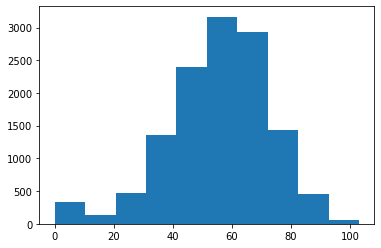

In [53]:
import matplotlib.pyplot as plt
plt.hist(AGE_1)
plt.show()

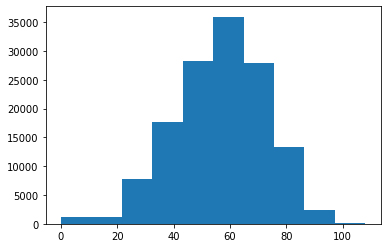

In [54]:
import matplotlib.pyplot as plt
plt.hist(AGE_0)
plt.show()

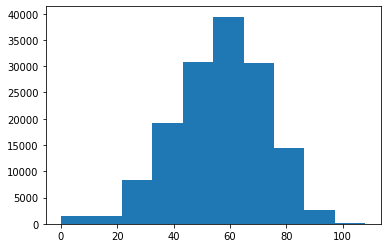

In [55]:
import matplotlib.pyplot as plt
plt.hist(AGE_ICU['AGE'])
plt.show()